In [ ]:
# Testing different time series Machine Learnig models 
# Analising how all models work for one Stock (APPLE)

In [2]:
import pandas as pd
import numpy as np
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('./all_stocks_5yr.csv')
data.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [3]:
missing_values = []
missing_values = data[data.isnull().any(axis=1) == True]
missing_values

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


In [4]:
data.dropna(inplace=True)

In [5]:
missing_values = []
missing_values = data[data.isnull().any(axis=1) == True]
missing_values

,date,open,high,low,close,volume,Name


In [6]:
data_AAPL = data[data.Name == 'AAPL']
data_AAPL.head(3)

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL


In [7]:
asd = data_AAPL[['date', 'close']]
asd.head(3)

,date,close
1259,2013-02-08,67.8542
1260,2013-02-11,68.5614
1261,2013-02-12,66.8428


In [8]:
#AAPL[AAPL.index == 1484]

In [9]:
#asd = AAPL[AAPL.index <= 1484]
#asd.head(3)
#asd.dtypes

In [10]:
#asd[225:]

In [11]:
asd['new_date'] = pd.to_datetime(asd['date'])
asd.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,close,new_date
1259,2013-02-08,67.8542,2013-02-08
1260,2013-02-11,68.5614,2013-02-11
1261,2013-02-12,66.8428,2013-02-12


In [12]:
asd = asd.drop(['date'], axis=1)

In [13]:
asd.head(3)

,close,new_date
1259,67.8542,2013-02-08
1260,68.5614,2013-02-11
1261,66.8428,2013-02-12


In [14]:
#asd['100ma'] = asd['close'].rolling(window=100, min_periods=0).mean()

In [15]:
#asd.tail()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2354.725
Method:                       css-mle   S.D. of innovations              1.573
Date:                Fri, 29 Nov 2019   AIC                           4723.450
Time:                        14:41:29   BIC                           4759.411
Sample:                             1   HQIC                          4736.964
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0725      0.045      1.620      0.105      -0.015       0.160
ar.L1.D.close     0.0158      0.028      0.559      0.576      -0.040       0.071
ar.L2.D.close    -0.0321      0.028     

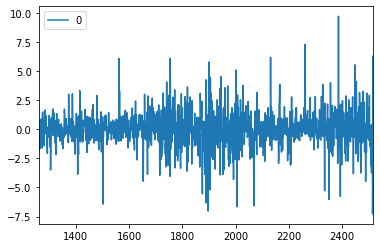

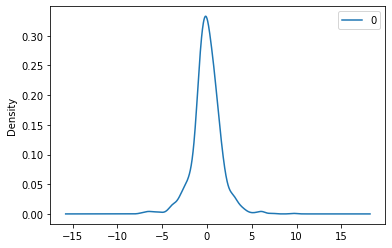

                 0
count  1258.000000
mean      0.000003
std       1.573431
min      -7.273198
25%      -0.730755
50%      -0.011729
75%       0.817192
max       9.711429


In [16]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model

model = ARIMA(asd['close'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#plot residual errors

residuals = DataFrame(model_fit.resid)
residuals
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Test MSE: 49.495


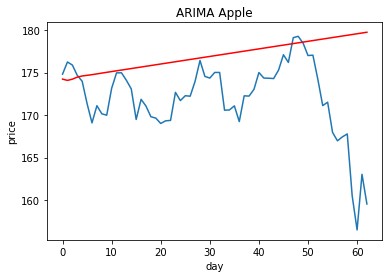

In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:] 

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps=len(test))[0]


error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("ARIMA Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [18]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:]
test

array([174.81, 176.24, 175.88, 174.67, 173.97, 171.34, 169.08, 171.1 ,
       170.15, 169.98, 173.14, 174.96, 174.97, 174.09, 173.07, 169.48,
       171.85, 171.05, 169.8 , 169.64, 169.01, 169.32, 169.37, 172.67,
       171.7 , 172.27, 172.22, 173.97, 176.42, 174.54, 174.35, 175.01,
       175.01, 170.57, 170.6 , 171.08, 169.23, 172.26, 172.23, 173.03,
       175.  , 174.35, 174.33, 174.29, 175.28, 177.09, 176.19, 179.1 ,
       179.26, 178.46, 177.  , 177.04, 174.22, 171.11, 171.51, 167.96,
       166.97, 167.43, 167.78, 160.5 , 156.49, 163.03, 159.54])

In [19]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions

array([174.18641976, 173.80466707, 174.01417388, 174.40209053,
       174.67556302, 174.54170192, 174.32474273, 174.6826666 ,
       175.13676138, 175.28546978, 175.23086778, 175.12702278,
       175.46993493, 175.83980444, 176.16942804, 176.24496693,
       176.06354946, 176.26104934, 176.57199982, 176.68059677,
       176.66471364, 176.71737341, 176.83750033, 176.95327887,
       177.0373535 , 177.05229682, 177.10526755, 177.22848897,
       177.34346606, 177.41445184, 177.45054371, 177.52035699,
       177.61851783, 177.70618188, 177.79158045, 177.84975106,
       177.90733947, 177.99522945, 178.08304419, 178.14861973,
       178.21014553, 178.28500795, 178.36290348, 178.43947364,
       178.50942415, 178.57464103, 178.64655488, 178.72380885,
       178.79937957, 178.86850183, 178.93658385, 179.00989725,
       179.0836956 , 179.15608903, 179.22762505, 179.2976027 ,
       179.36882175, 179.44228685, 179.51465576, 179.58473785,
       179.65552369, 179.72760179, 179.79966477])

Test MSE: 52.827


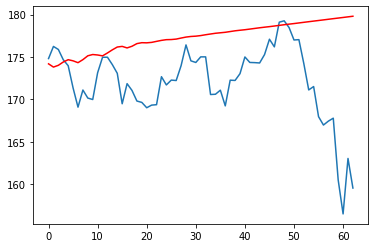

In [20]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 52.827


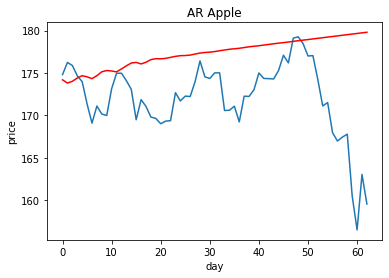

In [21]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:]

model = AR(train)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train) + len(test)-1)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("AR Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 1080.908


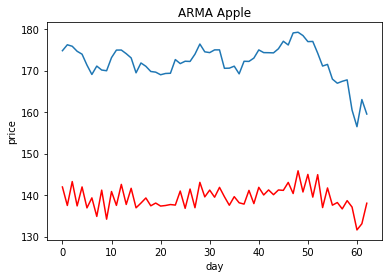

In [22]:
from statsmodels.tsa.arima_model import ARMA

X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []


for t in range(len(test)):
    model =ARMA(history, order=(0, 1))
    model_fit = model.fit(disp=False)
    output = model_fit.predict(start=len(history), end=len(history)+len(test)-1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("ARMA Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 2491.303


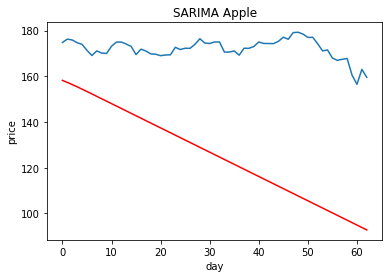

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMA example

X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]

model =SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(start=len(history), end=len(history)+len(test)-1, dynamic=False)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("SARIMA Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 23.513


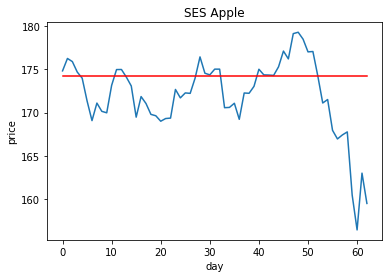

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

model =SimpleExpSmoothing(history)
model_fit = model.fit()
predictions = model_fit.predict(start=len(history), end=len(history)+len(test)-1)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("SES Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test MSE: 23.513


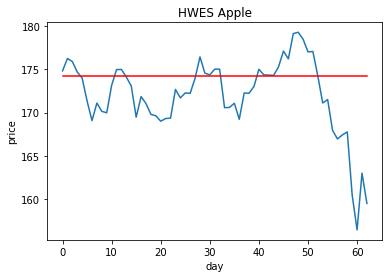

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

X = asd.close.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

model =ExponentialSmoothing(history)
model_fit = model.fit()
predictions = model_fit.predict(start=len(history), end=len(history)+len(test)-1)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.title("HWES Apple")
plt.xlabel('day')
plt.ylabel('price')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()